In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('HomeC.csv')

In [ ]:
pd.set_option('display.max_columns', 500)

In [ ]:
df.drop(df.iloc[:, 4:19], inplace=True, axis=1)
  
df

In [ ]:
df.dropna()

In [ ]:
def ac(df):
    df['Air Conditioning'] = df['House overall [kW]'] * 0.169 * 1440
    df['Space Heating'] = df['House overall [kW]'] * 0.228 * 1440
    df['Water Heating'] = df['House overall [kW]'] * 0.137 * 1440
    df['Lighting'] = df['House overall [kW]'] * 0.103 * 1440
    df['Refrigerators'] = df['House overall [kW]'] * 0.6 * 1440
    df['TV'] = df['House overall [kW]'] * 0.5 * 1440
    df['Clothes Dryer'] = df['House overall [kW]'] * 0.14 * 1440
    df['Oven'] = df['House overall [kW]'] * 0.014 * 1440
    df['Microwave'] = df['House overall [kW]'] * 0.011 * 1440
    df['Dishwasher'] = df['House overall [kW]'] * 0.006 * 1440
    df['Clother washer'] = df['House overall [kW]'] * 0.18 * 1440
    df['Other'] = df['House overall [kW]'] * 0.0163 * 1440
    
    
    
    
ac(df)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df_pie = df.iloc[:, 17:29]
df_pie

In [ ]:
df_pie.loc['mean'] = df_pie.mean()

In [ ]:
df_pie_1 = df_pie.copy()
df_pie_1

In [ ]:
df_pie_1['Heating and Cooling'] = df_pie['Air Conditioning'] + df_pie['Space Heating'] + df_pie['Water Heating']
df_pie_1.drop(['Air Conditioning', 'Space Heating', 'Water Heating'], axis = 1, inplace = True)

df_pie_1['Appliances'] = df_pie['Refrigerators'] + df_pie['TV'] + df_pie['Clothes Dryer'] + df_pie['Oven'] + df_pie['Microwave'] + df_pie['Dishwasher'] + df_pie['Clother washer'] + df_pie['Other']
df_pie_1.drop(['Refrigerators', 'TV', 'Clothes Dryer', 'Oven', 'Microwave', 'Dishwasher', 'Clother washer', 'Other'], axis = 1, inplace = True)

In [ ]:
df_pien = df_pie_1.T
df_pien

In [ ]:
df_pien.reset_index(inplace=True)
df_pien

In [ ]:
import plotly.express as px

fig = px.pie(df_pien, values = 'mean', names = 'index', title = 'Energy consumption in household')
fig.show()

In [ ]:
df_pie_2 = df_pie.copy()

In [ ]:
df_pie_2.drop(['Air Conditioning', 'Space Heating', 'Water Heating', 'Lighting'], axis = 1, inplace = True)
df_pie_2

In [ ]:
df_pienn = df_pie_2.T


In [ ]:
df_pienn.reset_index(inplace=True)
df_pienn

In [ ]:
import plotly.express as px

fig = px.pie(df_pienn, values = 'mean', names = 'index', title = 'Energy consumption among household appliances')
fig.show()

In [ ]:
import plotly.express as px

fig = px.bar(df_pienn, x = 'index', y='mean')
fig.show()

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize = (15, 7))
sns.barplot(x = 'index',
            y = 'mean',
            data = df_pienn, 
           palette = 'Set2').set(title = 'Consumption among household appliances')

sns.dark_palette((260, 75, 60), input="husl")

plt.xlabel('Categories of household appliances')
plt.ylabel('Average Energy Consumption [kW]')

plt.show()

plt.savefig('D.png')

In [22]:
df_previous = df.tail(5000).iloc[:, 17:29]

,Air Conditioning,Space Heating,Water Heating,Lighting,Refrigerators,TV,Clothes Dryer,Oven,Microwave,Dishwasher,Clother washer,Other
498910,377.463528,509.240736,305.991144,230.051736,1340.1072,1116.756,312.69168,31.269168,24.568632,13.401072,402.03216,36.406246
498911,355.443504,479.533248,288.140592,216.631248,1261.9296,1051.608,294.45024,29.445024,23.135376,12.619296,378.57888,34.282421
498912,277.840056,374.837472,225.231288,169.334472,986.4144,822.012,230.16336,23.016336,18.084264,9.864144,295.92432,26.797591
498913,176.967336,238.748832,143.458728,107.855832,628.2864,523.572,146.60016,14.660016,11.518584,6.282864,188.48592,17.068447
498914,137.891832,186.031584,111.782136,84.040584,489.5568,407.964,114.22992,11.422992,8.975208,4.895568,146.86704,13.299626
...,...,...,...,...,...,...,...,...,...,...,...,...
503905,389.676144,525.716928,315.891312,237.494928,1383.4656,1152.888,322.80864,32.280864,25.363536,13.834656,415.03968,37.584149
503906,389.213760,525.093120,315.516480,237.213120,1381.8240,1151.520,322.42560,32.242560,25.333440,13.818240,414.54720,37.539552
503907,468.289536,631.775232,379.619328,285.407232,1662.5664,1385.472,387.93216,38.793216,30.480384,16.625664,498.76992,45.166387
503908,481.414752,649.482624,390.259296,293.406624,1709.1648,1424.304,398.80512,39.880512,31.334688,17.091648,512.74944,46.432310


In [23]:
df_previous.loc['mean'] = df_previous.mean()


,Air Conditioning,Space Heating,Water Heating,Lighting,Refrigerators,TV,Clothes Dryer,Oven,Microwave,Dishwasher,Clother washer,Other
498910,377.463528,509.240736,305.991144,230.051736,1340.107200,1116.756000,312.691680,31.269168,24.568632,13.401072,402.032160,36.406246
498911,355.443504,479.533248,288.140592,216.631248,1261.929600,1051.608000,294.450240,29.445024,23.135376,12.619296,378.578880,34.282421
498912,277.840056,374.837472,225.231288,169.334472,986.414400,822.012000,230.163360,23.016336,18.084264,9.864144,295.924320,26.797591
498913,176.967336,238.748832,143.458728,107.855832,628.286400,523.572000,146.600160,14.660016,11.518584,6.282864,188.485920,17.068447
498914,137.891832,186.031584,111.782136,84.040584,489.556800,407.964000,114.229920,11.422992,8.975208,4.895568,146.867040,13.299626
...,...,...,...,...,...,...,...,...,...,...,...,...
503906,389.213760,525.093120,315.516480,237.213120,1381.824000,1151.520000,322.425600,32.242560,25.333440,13.818240,414.547200,37.539552
503907,468.289536,631.775232,379.619328,285.407232,1662.566400,1385.472000,387.932160,38.793216,30.480384,16.625664,498.769920,45.166387
503908,481.414752,649.482624,390.259296,293.406624,1709.164800,1424.304000,398.805120,39.880512,31.334688,17.091648,512.749440,46.432310
503909,484.517592,653.668704,392.774616,295.297704,1720.180800,1433.484000,401.375520,40.137552,31.536648,17.201808,516.054240,46.731578


In [24]:
df_previous_1 = df_previous.T

In [25]:
df_previous_1.reset_index(inplace = True)

In [27]:
df_previous_up = df_previous_1[['index', 'mean']]

,index,mean
0,Air Conditioning,221.700480
1,Space Heating,299.098872
2,Water Heating,179.721691
3,Lighting,135.119227
4,Refrigerators,787.102295
5,TV,655.918579
6,Clothes Dryer,183.657202
7,Oven,18.365720
8,Microwave,14.430209
9,Dishwasher,7.871023


In [28]:
df_pie_n = df_pie.T

In [29]:
df_pie_n.reset_index(inplace = True)

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,503661,503662,503663,503664,503665,503666,503667,503668,503669,503670,503671,503672,503673,503674,503675,503676,503677,503678,503679,503680,503681,503682,503683,503684,503685,503686,503687,503688,503689,503690,503691,503692,503693,503694,503695,503696,503697,503698,503699,503700,503701,503702,503703,503704,503705,503706,503707,503708,503709,503710,503711,503712,503713,503714,503715,503716,503717,503718,503719,503720,503721,503722,503723,503724,503725,503726,503727,503728,503729,503730,503731,503732,503733,503734,503735,503736,503737,503738,503739,503740,503741,503742,503743,503744,503745,503746,503747,503748,503749,503750,503751,503752,503753,503754,503755,503756,503757,503758,503759,503760,503761,503762,503763,503764,503765,503766,503767,503768,503769,503770,503771,503772,503773,503774,503775,503776,503777,503778,503779,503780,503781,503782,503783,503784,503785,503786,503787,503788,503789,503790,503791,503792,503793,503794,503795,503796,503797,503798,503799,503800,503801,503802,503803,503804,503805,503806,503807,503808,503809,503810,503811,503812,503813,503814,503815,503816,503817,503818,503819,503820,503821,503822,503823,503824,503825,503826,503827,503828,503829,503830,503831,503832,503833,503834,503835,503836,503837,503838,503839,503840,503841,503842,503843,503844,503845,503846,503847,503848,503849,503850,503851,503852,503853,503854,503855,503856,503857,503858,503859,503860,503861,503862,503863,503864,503865,503866,503867,503868,503869,503870,503871,503872,503873,503874,503875,503876,503877,503878,503879,503880,503881,503882,503883,503884,503885,503886,503887,503888,503889,503890,503891,503892,503893,503894,503895,503896,503897,503898,503899,503900,503901,503902,503903,503904,503905,503906,503907,503908,503909,mean
0,Air Conditioning,227.014320,227.379360,226.766904,248.726088,277.284384,338.724672,332.482488,348.467184,396.019728,422.322888,385.745880,367.550664,355.273152,204.564360,171.130752,139.173528,118.208064,127.317840,130.489632,129.990744,129.909624,127.431408,140.479560,165.379344,314.705040,376.39680,443.487096,643.082856,423.288216,288.916992,289.829592,202.739160,203.031192,204.527856,211.658304,207.801048,206.636976,246.60480,320.237424,402.643176,385.01580,350.53980,346.021416,178.188192,127.330008,123.80940,149.321640,223.323360,233.479584,223.558608,203.692320,120.430752,142.900992,226.495152,331.176456,331.444152,279.697704,251.346264,173.807712,120.966144,113.194848,124.827456,158.496312,172.895112,290.981496,288.324816,281.672976,198.488472,150.652008,183.5340,253.609512,322.338432,330.839808,319.604688,390.150696,294.165456,261.019824,250.247088,249.500784,249.654912,266.608992,243.080136,142.138464,138.256872,144.117792,169.962624,212.218032,320.947224,337.442976,336.95220,294.806304,261.137448,216.975720,218.999664,202.142928,139.315488,102.746592,102.543792,102.089520,123.265896,151.442928,231.524592,238.736160,255.065616,334.968816,393.273816,392.641080,382.898568,351.862056,228.981480,101.939448,102.077352,101.777208,104.304096,106.263144,107.865264,153.706176,260.399256,247.31460,199.717440,131.21160,137.344272,233.

In [30]:
df_pie_up = df_pie_n[['index', 'mean']]

,index,mean
0,Air Conditioning,209.037088
1,Space Heating,282.014534
2,Water Heating,169.456101
3,Lighting,127.401302
4,Refrigerators,742.143509
5,TV,618.452924
6,Clothes Dryer,173.166819
7,Oven,17.316682
8,Microwave,13.605964
9,Dishwasher,7.421435


In [31]:
df = pd.DataFrame(columns = [['app', 'Consumption for july', 'Consumption for june']])

In [32]:
df['app'] = df_previous_up['index']
df['Consumption for july'] = df_previous_up['mean']
df['Consumption for june'] = df_pie_up['mean']

In [34]:
df.iloc[0, 0] = 'AC'
df.iloc[1, 0] = 'Space_Heating'
df.iloc[2, 0] = 'Water_Heating'
df.iloc[6, 0] = 'Dryer'
df.iloc[10, 0] = 'Washer'

,app,Consumption for july,Consumption for june
0,AC,221.700480,209.037088
1,Space_Heating,299.098872,282.014534
2,Water_Heating,179.721691,169.456101
3,Lighting,135.119227,127.401302
4,Refrigerators,787.102295,742.143509
5,TV,655.918579,618.452924
6,Dryer,183.657202,173.166819
7,Oven,18.365720,17.316682
8,Microwave,14.430209,13.605964
9,Dishwasher,7.871023,7.421435


In [35]:
df.index = df.index.astype('string')

In [36]:
df.set_index('app', inplace = True)

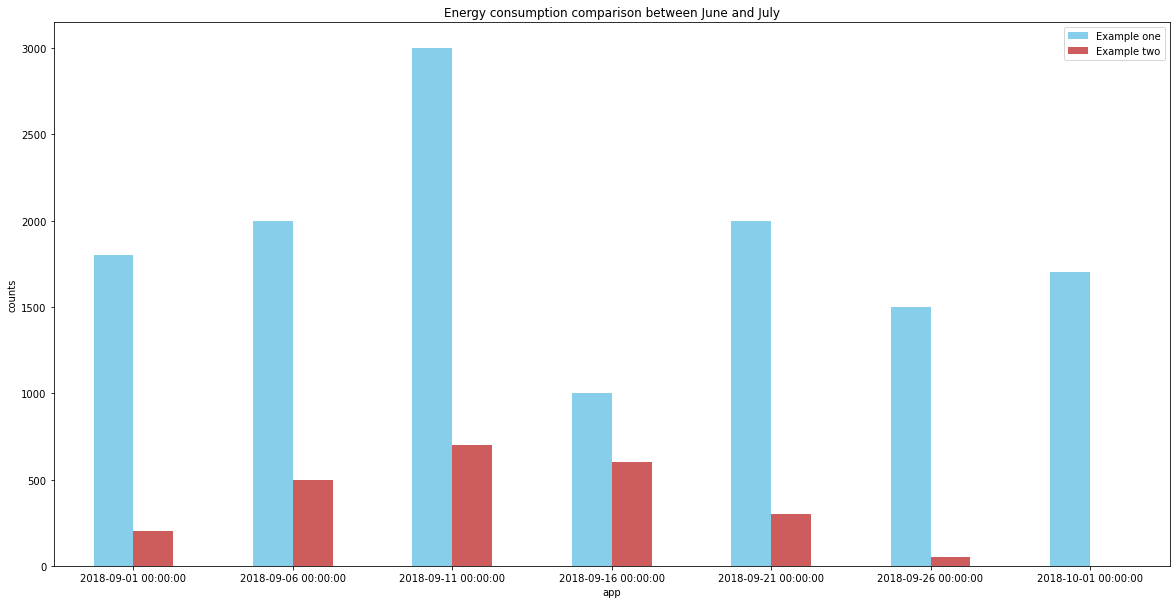

In [45]:
#### import matplotlib.pyplot as plt
import pandas as pd

# fig, ax = plt.subplots(figsize = (15, 5))
ax = df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Energy consumption comparison between June and July", figsize = (20, 10))
ax.set_xlabel("app")
ax.set_ylabel("counts")
# plt.show()
plt.savefig('C.jpg')

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
times = pd.date_range('2018-09-01', periods=7, freq='5D')
yesSeries = pd.Series([1800,2000,3000,1000,2000,1500,1700], index=times)
nodSeries = pd.Series([200,500,700,600,300,50,0], index=times)


In [40]:
df = pd.DataFrame({"Example one":yesSeries,"Example two":nodSeries})

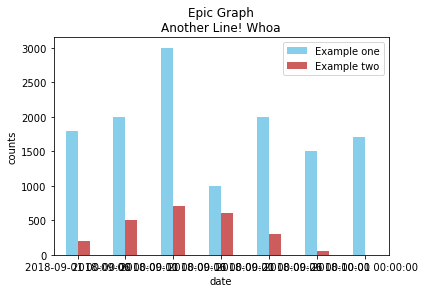

In [42]:
ax = df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Epic Graph\nAnother Line! Whoa")
ax.set_xlabel("date")
ax.set_ylabel("counts")
plt.show()